Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


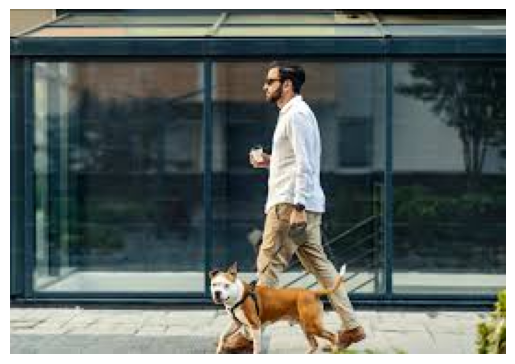

In [11]:
# prompt: load image.png from the same folder in google drive

from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
import matplotlib.pyplot as plt

# path del archivo que vamos a leer
image_path = '/content/drive/MyDrive/Colab Notebooks/imagen.jpg' # Replace 'Your_Folder' with the actual folder name

try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off') # quitamos la informacion de los ejes
    plt.show()
except FileNotFoundError:
    print(f"Error: The file '{image_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [12]:
# prompt: install yolov8

!pip install ultralytics


0: 448x640 1 person, 1 dog, 284.3ms
Speed: 3.9ms preprocess, 284.3ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
Clase detectada: dog
Coordenadas (xmin, ymin, xmax, ymax): [107.65387725830078, 136.30718994140625, 194.4580078125, 187.0]
Clase detectada: person
Coordenadas (xmin, ymin, xmax, ymax): [128.4649658203125, 29.28072738647461, 185.9542999267578, 165.67201232910156]


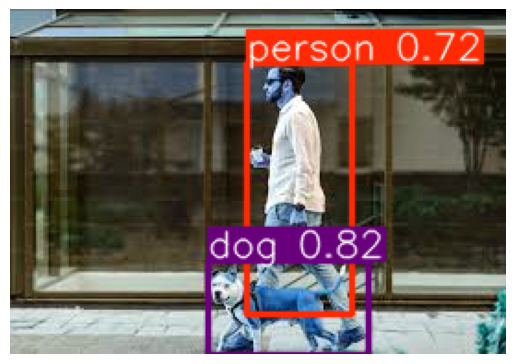

In [13]:
import matplotlib.pyplot as plt
import torch
from ultralytics import YOLO

# Cargamos un modelo preentrenado y pasamos la imagen por el
model = YOLO('yolov8n.pt')
results = model(img)

# imprimimos los objetos detectados junto a sus cajas
for r in results:
  boxes = r.boxes
  for box in boxes:
    class_id = int(box.cls)
    class_name = model.names[class_id]
    print(f"Clase detectada: {class_name}")
    coords = box.xyxy.squeeze().tolist()
    print(f"Coordenadas (xmin, ymin, xmax, ymax): {coords}")

# Visualisamos la imagen con las cajas
results[0].plot()
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()




0: 1024x1024 1 0, 32721.8ms
Speed: 14.3ms preprocess, 32721.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


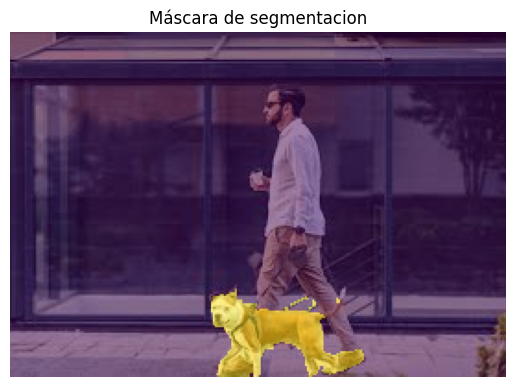


0: 1024x1024 1 0, 33068.1ms
Speed: 20.9ms preprocess, 33068.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)


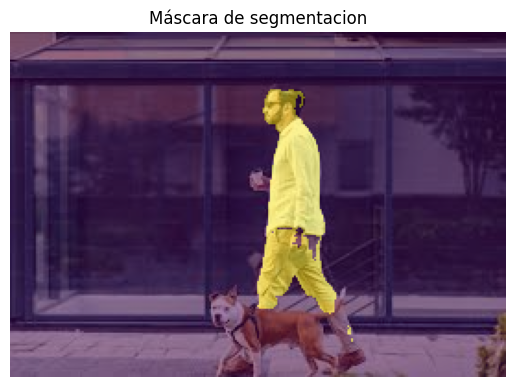

In [17]:
from ultralytics import SAM

# Cargamos un modelo preentrenado de sam
sam = SAM('sam_b.pt')


for result in results:
  for box in result.boxes:
    # Usamos las cajas dadas por yolo para hacer la segmentacion con SAM
    coords = box.xyxy.squeeze().tolist()

    sam_results = sam(img, bboxes=[coords])

    for sam_result in sam_results:
      if hasattr(sam_result, 'masks') and sam_result.masks is not None:
        masks = sam_result.masks.data.cpu().numpy() # Convertimos a un arreglo de numpy para poder visualizar
        i= 0
        # Vemos cada mascara generada
        for mask in masks:
          i += 1
          plt.figure()
          plt.imshow(img)
          plt.imshow(mask, cmap='viridis', alpha=0.5)
          plt.axis('off')
          plt.title(f"Máscara de segmentacion")
          plt.show()
          #save each image
          plt.imsave(f"mascara_{i}.png", mask)
      else:
          print("No se detectó nada")




In [9]:
# prompt: in a csv, save the info of all the classes detected, including the class name and the boxes coordenates

import csv

csv_file_path = '/content/drive/MyDrive/Colab Notebooks/detections.csv' # Define your desired CSV file path

with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)


    writer.writerow(['Class Name', 'xmin', 'ymin', 'xmax', 'ymax'])

    # Iteramos por los resultados dados por yolo y los guardamos en un csv
    for r in results:
        boxes = r.boxes
        for box in boxes:
            class_id = int(box.cls)
            class_name = model.names[class_id]
            coords = box.xyxy.squeeze().tolist()

            writer.writerow([class_name, coords[0], coords[1], coords[2], coords[3]])

print(f"Resultados guardados en: {csv_file_path}")

Detection results saved to /content/drive/MyDrive/Colab Notebooks/detections.csv
